In [86]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression

data = pd.read_csv("hw4_data.csv") #使用 pandas 的方式讀取 CSV
#print(data)
#data.head()

inputX = data[["Unnamed: 0", "w1 = 4"]].to_numpy() #需要為 np.array 的形式!
# X = data.loc[:, ["Unnamed: 0", "w1 = 4"]].values 
# X = data.iloc[:, [0, 2]].values
#loc 與 iloc 差別在於 index 方式
#產生出來的都還會是 dataframe，取 values 變成 np.array

X = inputX
inputY = []
for element in data["w1 = 4"]:
    if element > 0.5:
        inputY.append(1)
    else:
        inputY.append(0)
        
Y = np.array(inputY)
# print(inputX)

In [87]:
# 選定所要使用的模型
logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

# Train the model using the training sets
logreg.fit(X, Y)

print('coefficient:' , logreg.coef_) #係數 A
print("intercept:", logreg.intercept_, end='\n') #截距 C

coefficient: [[28.72275346 29.79811067]]
intercept: [-17.80397745]


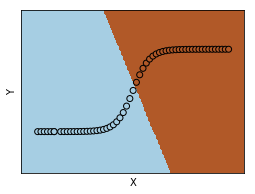

In [88]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('X')
plt.ylabel('Y')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()